# HW: Image Data
---

### data
```
    /img
```

# Tasks:
---

+ Classify cats vs dogs in the small training set (DONE)
+ Explore Random forests, Decision trees, Extra-trees, Gardient Boosting, LGBM (DONE)
+ Plot the ROC curve  (DONE)
+ First sensitivity at 95% specificity (DONE)
+ Compute PPV (DONE)
+ Report Best PPV, and the classifier that achieves that (DONE)

ADDITIONAL
+ Logistic Regression (DONE)
+ Convex Hull of multiple classifiers  (DONE)
+ Convolutional Neural Network with Keras  (DONE)


### Attempt to do the analysis on the full training set, and test withthe test set

In [ ]:
#numerical python modules + pandas
import pandas as pd
import numpy as np
import statistics

#VIZ
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns

#Misc Tools
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs

#Five Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

#might use feature sel
from sklearn import svm


#ROC/AUC/CONFUSION MATRIX
from sklearn import metrics
from sklearn.metrics import roc_auc_score, precision_recall_curve, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#CONVEX HULL FOR FUTURE MAXIMISATION
from scipy.spatial import ConvexHull
from sklearn.datasets import make_classification

from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
import matplotlib.pyplot as plt
%matplotlib inline 

import os
import cv2
import itertools


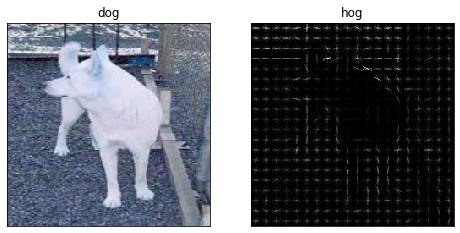

In [ ]:
dog = cv2.imread('./img/trainsmall/dog.10762.jpg')
dog=cv2.resize(dog,(240,240))
# https://en.wikipedia.org/wiki/German_Shepherd#/media/File:Kim_at_14_weeks.jpg
 
# scale down the image to one third
# dog = rescale(dog, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
dog_hog, dog_hog_img = hog(
    dog, pixels_per_cell=(12, 12),
    cells_per_block=(2,2),
    orientations=8,
    visualize=True,
    block_norm='L2-Hys')
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# # remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    for a in ax]

# dog_hog_img
ax[0].imshow(dog)
ax[0].set_title('dog')
ax[1].imshow(dog_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img,(240,240))
#         img = rescale(img, 1/3, mode='reflect')
        img_hog, img_hog_img = hog(
            img, pixels_per_cell=(12, 12),
            cells_per_block=(2,2),
            orientations=8,
            visualize=True,
            block_norm='L2-Hys')
        images.append(img_hog)
    return images

In [ ]:
Cats = load_images_from_folder("./img/smalldataset/cats")
Dogs = load_images_from_folder("./img/smalldataset/dogs")

In [ ]:
df_cats=pd.DataFrame(Cats)
df_dogs=pd.DataFrame(Dogs)

In [ ]:
df_cats['LABEL']=['CAT' for x in df_cats[0].values]
df_dogs['LABEL']=['DOG' for x in df_dogs[0].values]

In [ ]:
df_cats

,0,1,2,3,4,5,6,7,8,9,...,11543,11544,11545,11546,11547,11548,11549,11550,11551,LABEL
0,0.355194,0.278417,0.105439,0.010636,0.054572,0.032649,0.011800,0.252324,0.355194,0.355194,...,0.028588,0.276396,0.276396,0.276396,0.114354,0.090404,0.020215,0.095083,0.108746,CAT
1,0.252660,0.157040,0.093779,0.104622,0.184751,0.093228,0.178073,0.252660,0.252660,0.235853,...,0.108407,0.316221,0.085675,0.099405,0.000000,0.046355,0.025913,0.153075,0.097185,CAT
2,0.252325,0.252325,0.233651,0.233120,0.252325,0.066265,0.055504,0.033723,0.252325,0.252325,...,0.171038,0.127114,0.010094,0.056105,0.075169,0.275464,0.275464,0.182641,0.117137,CAT
3,0.245863,0.227409,0.114614,0.068065,0.245863,0.038176,0.222243,0.169263,0.245863,0.093730,...,0.223366,0.230010,0.116065,0.103301,0.029127,0.086529,0.075733,0.224860,0.230010,CAT
4,0.006012,0.000000,0.088726,0.291141,0.377028,0.017923,0.019916,0.000000,0.012023,0.000000,...,0.013546,0.032316,0.015883,0.052921,0.302074,0.345096,0.123438,0.059469,0.033637,CAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.234862,0.090224,0.097449,0.173233,0.234862,0.109328,0.107976,0.096713,0.234862,0.098748,...,0.187668,0.236988,0.157720,0.191528,0.109647,0.230650,0.093403,0.200020,0.056199,CAT
86,0.000000,0.000000,0.000000,0.000000,0.434148,0.000000,0.000000,0.000000,0.372328,0.046922,...,0.000000,0.320807,0.000000,0.070262,0.000000,0.314658,0.000000,0.046841,0.000000,CAT
87,0.296325,0.016642,0.153473,0.000000,0.296325,0.043477,0.052627,0.023536,0.296325,0.076761,...,0.073082,0.143044,0.012385,0.167540,0.232517,0.282578,0.242238,0.118640,0.020460,CAT
88,0.027915,0.001246,0.001970,0.000000,0.002786,0.002247,0.012673,0.004871,0.516320,0.015568,...,0.359219,0.359219,0.076463,0.055978,0.001629,0.021366,0.014446,0.023659,0.275242,CAT


In [ ]:
df_dogs

,0,1,2,3,4,5,6,7,8,9,...,11543,11544,11545,11546,11547,11548,11549,11550,11551,LABEL
0,0.188097,0.030693,0.034426,0.004029,0.018224,0.004604,0.084294,0.391930,0.246678,0.020013,...,0.088169,0.265352,0.265352,0.265352,0.136123,0.084188,0.047326,0.048770,0.046465,DOG
1,0.256843,0.069761,0.029864,0.019326,0.096064,0.016706,0.256843,0.256843,0.221408,0.058717,...,0.115335,0.216621,0.141065,0.189827,0.167401,0.152635,0.123587,0.108442,0.117543,DOG
2,0.237035,0.055409,0.136949,0.100984,0.237035,0.237035,0.219806,0.106143,0.237035,0.133334,...,0.237698,0.237698,0.130717,0.034544,0.051367,0.160438,0.201543,0.214782,0.189092,DOG
3,0.087927,0.123424,0.186547,0.232643,0.238710,0.123445,0.220320,0.085813,0.227139,0.243784,...,0.068490,0.142243,0.098894,0.255634,0.184011,0.255634,0.112415,0.149209,0.011731,DOG
4,0.192814,0.031694,0.004300,0.034116,0.161886,0.202035,0.309172,0.117630,0.086045,0.132682,...,0.178137,0.270738,0.166323,0.156790,0.139267,0.229709,0.066784,0.259451,0.270738,DOG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.046931,0.013831,0.011735,0.003808,0.049026,0.011236,0.013523,0.009425,0.479534,0.015309,...,0.021515,0.083728,0.065968,0.235133,0.174960,0.234211,0.182993,0.182150,0.036668,DOG
86,0.289700,0.210512,0.062277,0.058256,0.097161,0.057606,0.166959,0.233378,0.232595,0.205888,...,0.008501,0.069990,0.021182,0.044753,0.046634,0.286031,0.370760,0.128323,0.012141,DOG
87,0.264539,0.264539,0.264539,0.264539,0.264539,0.108429,0.046547,0.078243,0.221280,0.081206,...,0.080175,0.228601,0.098919,0.173500,0.061807,0.150534,0.042332,0.096543,0.084423,DOG
88,0.243796,0.063504,0.137077,0.124917,0.253638,0.128228,0.118612,0.160613,0.253638,0.035089,...,0.054389,0.167143,0.054869,0.189861,0.298433,0.298433,0.046846,0.067233,0.023067,DOG


In [ ]:
frames=[df_cats, df_dogs]
D=pd.concat(frames, ignore_index=True)
D

,0,1,2,3,4,5,6,7,8,9,...,11543,11544,11545,11546,11547,11548,11549,11550,11551,LABEL
0,0.355194,0.278417,0.105439,0.010636,0.054572,0.032649,0.011800,0.252324,0.355194,0.355194,...,0.028588,0.276396,0.276396,0.276396,0.114354,0.090404,0.020215,0.095083,0.108746,CAT
1,0.252660,0.157040,0.093779,0.104622,0.184751,0.093228,0.178073,0.252660,0.252660,0.235853,...,0.108407,0.316221,0.085675,0.099405,0.000000,0.046355,0.025913,0.153075,0.097185,CAT
2,0.252325,0.252325,0.233651,0.233120,0.252325,0.066265,0.055504,0.033723,0.252325,0.252325,...,0.171038,0.127114,0.010094,0.056105,0.075169,0.275464,0.275464,0.182641,0.117137,CAT
3,0.245863,0.227409,0.114614,0.068065,0.245863,0.038176,0.222243,0.169263,0.245863,0.093730,...,0.223366,0.230010,0.116065,0.103301,0.029127,0.086529,0.075733,0.224860,0.230010,CAT
4,0.006012,0.000000,0.088726,0.291141,0.377028,0.017923,0.019916,0.000000,0.012023,0.000000,...,0.013546,0.032316,0.015883,0.052921,0.302074,0.345096,0.123438,0.059469,0.033637,CAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.046931,0.013831,0.011735,0.003808,0.049026,0.011236,0.013523,0.009425,0.479534,0.015309,...,0.021515,0.083728,0.065968,0.235133,0.174960,0.234211,0.182993,0.182150,0.036668,DOG
176,0.289700,0.210512,0.062277,0.058256,0.097161,0.057606,0.166959,0.233378,0.232595,0.205888,...,0.008501,0.069990,0.021182,0.044753,0.046634,0.286031,0.370760,0.128323,0.012141,DOG
177,0.264539,0.264539,0.264539,0.264539,0.264539,0.108429,0.046547,0.078243,0.221280,0.081206,...,0.080175,0.228601,0.098919,0.173500,0.061807,0.150534,0.042332,0.096543,0.084423,DOG
178,0.243796,0.063504,0.137077,0.124917,0.253638,0.128228,0.118612,0.160613,0.253638,0.035089,...,0.054389,0.167143,0.054869,0.189861,0.298433,0.298433,0.046846,0.067233,0.023067,DOG


In [ ]:
y_=D.LABEL.values

In [ ]:
y_cats=np.array([i=='CAT' for i in y_]).astype(int)
y_dogs=np.array([i=='DOG' for i in y_]).astype(int)

In [ ]:
y_cats

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
X=D.drop(['LABEL'],axis=1).values.astype(float)

array([[0.35519389, 0.27841728, 0.10543944, ..., 0.02021506, 0.09508338,
        0.10874574],
       [0.25266049, 0.15703979, 0.09377928, ..., 0.02591339, 0.15307515,
        0.09718508],
       [0.2523255 , 0.2523255 , 0.23365139, ..., 0.27546411, 0.18264093,
        0.11713691],
       ...,
       [0.26453868, 0.26453868, 0.26453868, ..., 0.04233174, 0.09654267,
        0.08442336],
       [0.24379644, 0.0635045 , 0.13707661, ..., 0.04684611, 0.06723297,
        0.02306747],
       [0.28441057, 0.01608539, 0.06103975, ..., 0.32777127, 0.27815305,
        0.04920386]])

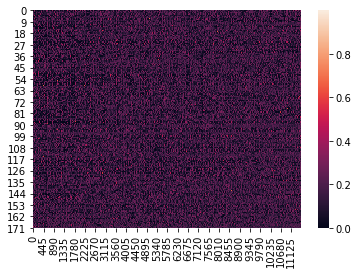

In [ ]:
import seaborn as sns
sns.heatmap(X)
X

In [ ]:
X_cats_train, X_cats_test, y_cats_train, y_cats_test = train_test_split(X, y_cats, test_size=0.5)

In [ ]:
X_dogs_train, X_dogs_test, y_dogs_train, y_dogs_test = train_test_split(X, y_dogs, test_size=0.5)

In [ ]:
#Decision Tree
def getAuc_DT(X_train, X_test, y_train, y_test, test_size=0.5,max_depth=None,n_estimators=100,minsplit=4,FPR=[],TPR=[]):
    CLASSIFIERS=[DecisionTreeClassifier(max_depth=max_depth, min_samples_split=minsplit),
                #RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                #ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                #GradientBoostingClassifier(n_estimators=100,max_depth=max_depth),
                #LGBMClassifier(n_estimators=100, max_depth=max_depth)
                ]

    for clf in CLASSIFIERS:
        clf.fit(X_train,y_train)
        y_pred=clf.predict_proba(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
        auc=metrics.auc(fpr, tpr)
        print('# Decision Tree AUC: ',auc)

        #PPV + Confusion Matrix
        fig, axs = plt.subplots(1,2, figsize=(20, 8))
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=None, ax=axs[0])
        disp.ax_.set_title("Confusion Matrix")

        tn, fp, fn, tp = disp.confusion_matrix.ravel()
        PPV=tp/(tp+fp)
        print("  True Positive: ", tp, "\n  False Positive: ", fp, "\n  True Negative: ", tn, "\n  False Negative: ", fn)
        print("  Decision Tree PPV: ", PPV)
        
        # Sensitivity at 95% Specificity
        sens=np.interp(0.05, fpr,tpr)
        print("  Sensitivity at 95% specificity: ", sens)
        
#         plt.plot(fpr,tpr)
        FPR=np.append(FPR,fpr)
        TPR=np.append(TPR,tpr)
    points=np.array([[a[0],a[1]] for a in zip(FPR,TPR)])
    hull = ConvexHull(points)
    x=np.argsort(points[hull.vertices,:][:,0])
    auc=metrics.auc(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
    plt.plot(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
    return auc

#Random Forest
def getAuc_RF(X_train, X_test, y_train, y_test, test_size=0.5,max_depth=None,n_estimators=100,minsplit=4,FPR=[],TPR=[]):
    CLASSIFIERS=[#DecisionTreeClassifier(max_depth=max_depth, min_samples_split=minsplit),
                RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                #ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                #GradientBoostingClassifier(n_estimators=100,max_depth=max_depth),
                #LGBMClassifier(n_estimators=100, max_depth=max_depth)
                ]

    for clf in CLASSIFIERS:
        clf.fit(X_train,y_train)
        y_pred=clf.predict_proba(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
        auc=metrics.auc(fpr, tpr)
        print('# Random Forest AUC: ',auc)

        #
        fig, axs = plt.subplots(1,2, figsize=(20, 8))
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=None, ax=axs[0])
        disp.ax_.set_title("Confusion Matrix")

        tn, fp, fn, tp = disp.confusion_matrix.ravel()
        PPV=tp/(tp+fp)
        print("  True Positive: ", tp, "\n  False Positive: ", fp, "\n  True Negative: ", tn, "\n  False Negative: ", fn)
        print("  Random Forest PPV: ", PPV)
        
        # Sensitivity at 95% Specificity
        sens=np.interp(0.05, fpr,tpr)
        print("  Sensitivity at 95% specificity: ", sens)
        
        
        FPR=np.append(FPR,fpr)
        TPR=np.append(TPR,tpr)
    points=np.array([[a[0],a[1]] for a in zip(FPR,TPR)])
    hull = ConvexHull(points)
    x=np.argsort(points[hull.vertices,:][:,0])
    auc=metrics.auc(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
    plt.plot(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
    return auc

#Extra Trees
def getAuc_ET(X_train, X_test, y_train, y_test, test_size=0.5,max_depth=None,n_estimators=100,minsplit=4,FPR=[],TPR=[]):
    CLASSIFIERS=[#DecisionTreeClassifier(max_depth=max_depth, min_samples_split=minsplit),
                #RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                #GradientBoostingClassifier(n_estimators=100,max_depth=max_depth),
                #LGBMClassifier(n_estimators=100, max_depth=max_depth)
                ]

    for clf in CLASSIFIERS:
        clf.fit(X_train,y_train)
        y_pred=clf.predict_proba(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
        auc=metrics.auc(fpr, tpr)
        print('# Extra Trees AUC: ',auc)

        #
        fig, axs = plt.subplots(1,2, figsize=(20, 8))
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=None, ax=axs[0])
        disp.ax_.set_title("Confusion Matrix")

        tn, fp, fn, tp = disp.confusion_matrix.ravel()
        PPV=tp/(tp+fp)
        print("  True Positive: ", tp, "\n  False Positive: ", fp, "\n  True Negative: ", tn, "\n  False Negative: ", fn)
        print("  Extra Trees PPV: ", PPV)
        
        # Sensitivity at 95% Specificity
        sens=np.interp(0.05, fpr,tpr)
        print("  Sensitivity at 95% specificity: ", sens)
        
        
        
        FPR=np.append(FPR,fpr)
        TPR=np.append(TPR,tpr)
    points=np.array([[a[0],a[1]] for a in zip(FPR,TPR)])
    hull = ConvexHull(points)
    x=np.argsort(points[hull.vertices,:][:,0])
    auc=metrics.auc(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
    plt.plot(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
    return auc


#Gradient Boosting
def getAuc_GB(X_train, X_test, y_train, y_test, test_size=0.5,max_depth=None,n_estimators=100,minsplit=4,FPR=[],TPR=[]):
    CLASSIFIERS=[#DecisionTreeClassifier(max_depth=max_depth, min_samples_split=minsplit),
                #RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                #ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                GradientBoostingClassifier(n_estimators=100,max_depth=max_depth),
                #LGBMClassifier(n_estimators=100, max_depth=max_depth)
                ]

    for clf in CLASSIFIERS:
        clf.fit(X_train,y_train)
        y_pred=clf.predict_proba(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
        auc=metrics.auc(fpr, tpr)
        print('# Gradient Boosting AUC: ',auc)

        #
        fig, axs = plt.subplots(1,2, figsize=(20, 8))
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=None, ax=axs[0])
        disp.ax_.set_title("Confusion Matrix")

        tn, fp, fn, tp = disp.confusion_matrix.ravel()
        PPV=tp/(tp+fp)
        print("  True Positive: ", tp, "\n  False Positive: ", fp, "\n  True Negative: ", tn, "\n  False Negative: ", fn)
        print("  Gradient Boosting PPV: ", PPV)
        
        # Sensitivity at 95% Specificity
        sens=np.interp(0.05, fpr,tpr)
        print("  Sensitivity at 95% specificity: ", sens)
        
        
        
        
        FPR=np.append(FPR,fpr)
        TPR=np.append(TPR,tpr)
    points=np.array([[a[0],a[1]] for a in zip(FPR,TPR)])
    
    hull = ConvexHull(points)
    x=np.argsort(points[hull.vertices,:][:,0])
    auc=metrics.auc(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
    plt.plot(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
    
    return auc

#LGBM
def getAuc_LGBM(X_train, X_test, y_train, y_test, test_size=0.5,max_depth=None,n_estimators=100,minsplit=4,FPR=[],TPR=[]):
    CLASSIFIERS=[#DecisionTreeClassifier(max_depth=max_depth, min_samples_split=minsplit),
                #RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                #ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                #GradientBoostingClassifier(n_estimators=n_estimators,max_depth=max_depth),
                LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth)
                ]

    for clf in CLASSIFIERS:
        clf.fit(X_train,y_train)
        y_pred=clf.predict_proba(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
        auc=metrics.auc(fpr, tpr)
        print('# LGBM AUC: ',auc)

        #
        fig, axs = plt.subplots(1,2, figsize=(20, 8))
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=None, ax=axs[0])
        disp.ax_.set_title("Confusion Matrix")

        tn, fp, fn, tp = disp.confusion_matrix.ravel()
        PPV=tp/(tp+fp)
        print("  True Positive: ", tp, "\n  False Positive: ", fp, "\n  True Negative: ", tn, "\n  False Negative: ", fn)
        print("  LGBM PPV: ", PPV)
        
        # Sensitivity at 95% Specificity
        sens=np.interp(0.05, fpr,tpr)
        print("  Sensitivity at 95% specificity: ", sens)
        
        
        
        FPR=np.append(FPR,fpr)
        TPR=np.append(TPR,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    points=np.array([[a[0],a[1]] for a in zip(FPR,TPR)])
    hull = ConvexHull(points)
    x=np.argsort(points[hull.vertices,:][:,0])
    auc=metrics.auc(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
#     plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
    plt.plot(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
    return auc

#LogReg
def getAuc_LogReg(X_train, X_test, y_train, y_test, test_size=0.5,max_depth=None,n_estimators=100,minsplit=4,FPR=[],TPR=[]):
    CLASSIFIERS=[#DecisionTreeClassifier(max_depth=max_depth, min_samples_split=minsplit),
                #RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                #ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                #GradientBoostingClassifier(n_estimators=n_estimators,max_depth=max_depth),
                #LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth),
                LogisticRegression()
                ]

    for clf in CLASSIFIERS:
        clf.fit(X_train,y_train)
        y_pred=clf.predict_proba(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
        auc=metrics.auc(fpr, tpr)
        print('# LogReg AUC: ',auc)

        #
        fig, axs = plt.subplots(1,2, figsize=(20, 8))
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=None, ax=axs[0])
        disp.ax_.set_title("Confusion Matrix")

        tn, fp, fn, tp = disp.confusion_matrix.ravel()
        PPV=tp/(tp+fp)
        print("  True Positive: ", tp, "\n  False Positive: ", fp, "\n  True Negative: ", tn, "\n  False Negative: ", fn)
        print("  LogReg PPV: ", PPV)
        
        # Sensitivity at 95% Specificity
        sens=np.interp(0.05, fpr,tpr)
        print("  Sensitivity at 95% specificity: ", sens)
        
        
        
        FPR=np.append(FPR,fpr)
        TPR=np.append(TPR,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    points=np.array([[a[0],a[1]] for a in zip(FPR,TPR)])
    hull = ConvexHull(points)
    x=np.argsort(points[hull.vertices,:][:,0])
    auc=metrics.auc(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
#     plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
    plt.plot(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
    return auc


#COMBINED PLOT
def getAuc(X_train, X_test, y_train, y_test, test_size=0.5,max_depth=None,n_estimators=100,minsplit=4,FPR=[],TPR=[]):
    CLASSIFIERS=[#DecisionTreeClassifier(max_depth=max_depth, min_samples_split=minsplit),
                 #RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                 #ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                 #GradientBoostingClassifier(n_estimators=n_estimators,max_depth=max_depth),
                 LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth),
                 LogisticRegression()
                ]
    
    plt.figure(figsize=(10,8))
    for clf in CLASSIFIERS:
        clf.fit(X_train,y_train)
        y_pred=clf.predict_proba(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
        auc=metrics.auc(fpr, tpr)
        print('# CLASSIFIER AUC: ',auc)

        
#         plt.plot(fpr, tpr)
        FPR=np.append(FPR,fpr)
        TPR=np.append(TPR,tpr)

    points=np.array([[a[0],a[1]] for a in zip(FPR,TPR)])
    hull = ConvexHull(points)
    x=np.argsort(points[hull.vertices,:][:,0])
    auc=metrics.auc(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
    
    print('# CONVEX HULL AUC: ',auc)
    plt.plot(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
    return auc

FOR cats: 
# Decision Tree AUC:  0.565
  True Positive:  26 
  False Positive:  26 
  True Negative:  24 
  False Negative:  14
  Decision Tree PPV:  0.5
  Sensitivity at 95% specificity:  0.0625


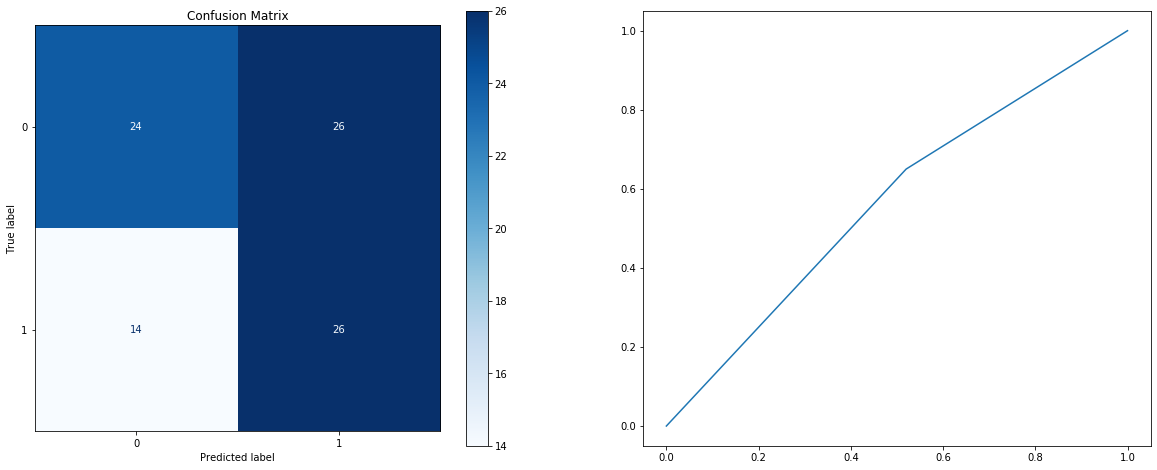

In [ ]:
print("FOR cats: ")
cats_DT=[getAuc_DT(X_cats_train, X_cats_test, y_cats_train, y_cats_test, minsplit=2,n_estimators=20)]



# Random Forest AUC:  0.645
  True Positive:  26 
  False Positive:  27 
  True Negative:  23 
  False Negative:  14
  Random Forest PPV:  0.49056603773584906
  Sensitivity at 95% specificity:  0.08125


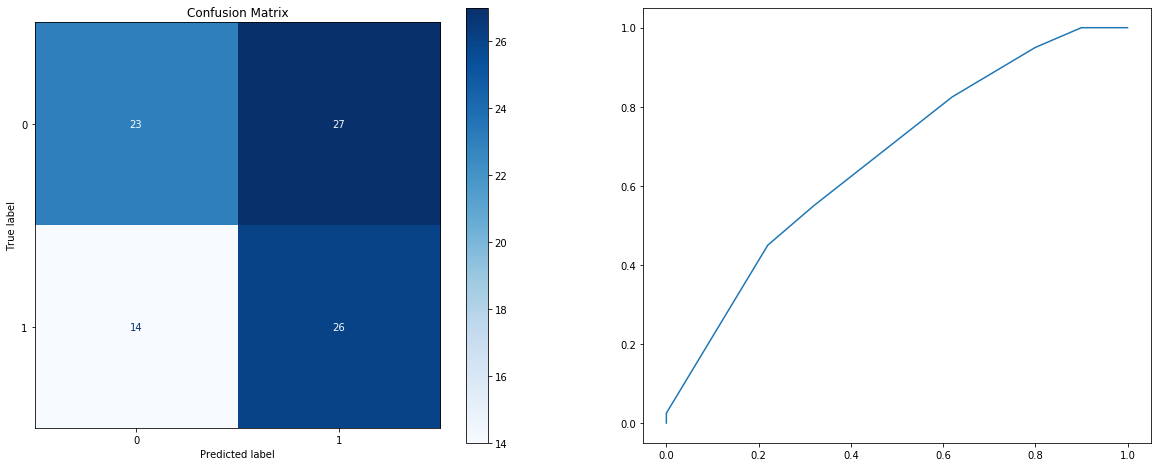

In [ ]:
cats_RF=[getAuc_RF(X_cats_train, X_cats_test, y_cats_train, y_cats_test, minsplit=3,n_estimators=20)]

# Extra Trees AUC:  0.6385000000000001
  True Positive:  23 
  False Positive:  23 
  True Negative:  27 
  False Negative:  17
  Extra Trees PPV:  0.5
  Sensitivity at 95% specificity:  0.11875000000000001


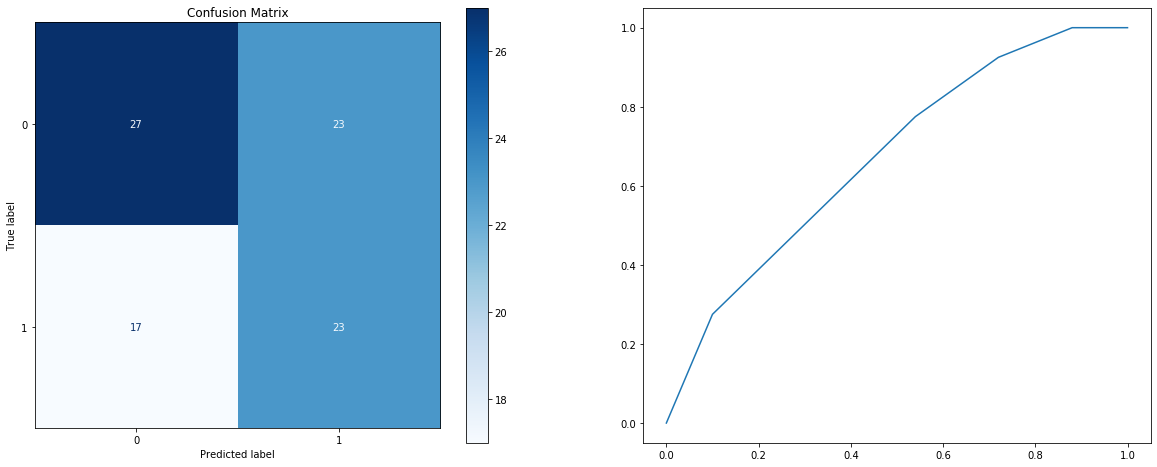

In [ ]:
cats_ET=[getAuc_ET(X_cats_train, X_cats_test, y_cats_train, y_cats_test, minsplit=3,n_estimators=20)]

# Gradient Boosting AUC:  0.6081349206349207
  True Positive:  26 
  False Positive:  23 
  True Negative:  25 
  False Negative:  16
  Gradient Boosting PPV:  0.5306122448979592
  Sensitivity at 95% specificity:  0.14285714285714285


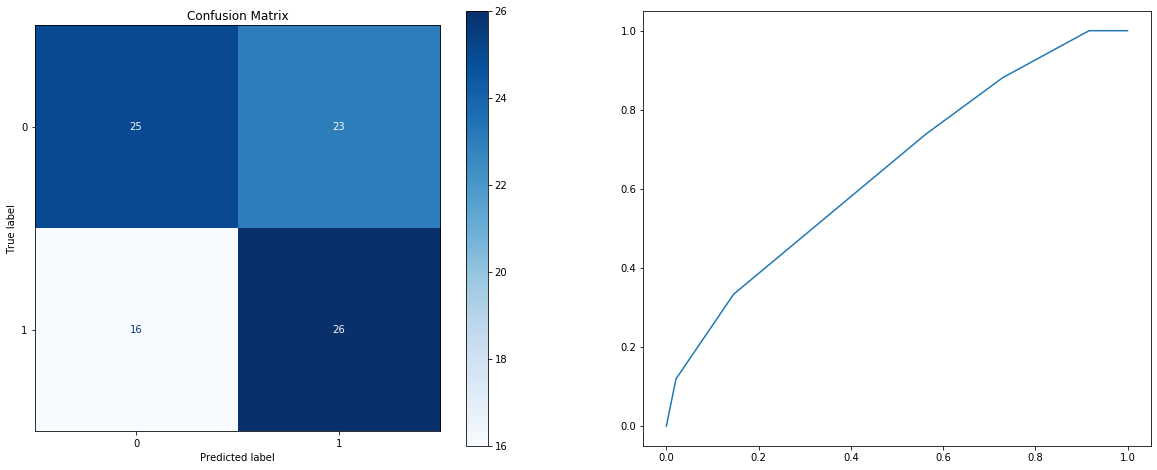

In [ ]:
cats_GB=[getAuc_GB(X_cats_train, X_cats_test, y_cats_train, y_cats_test, minsplit=3,n_estimators=20)]

# LGBM AUC:  0.7264197530864198
  True Positive:  26 
  False Positive:  16 
  True Negative:  29 
  False Negative:  19
  LGBM PPV:  0.6190476190476191
  Sensitivity at 95% specificity:  0.24444444444444444


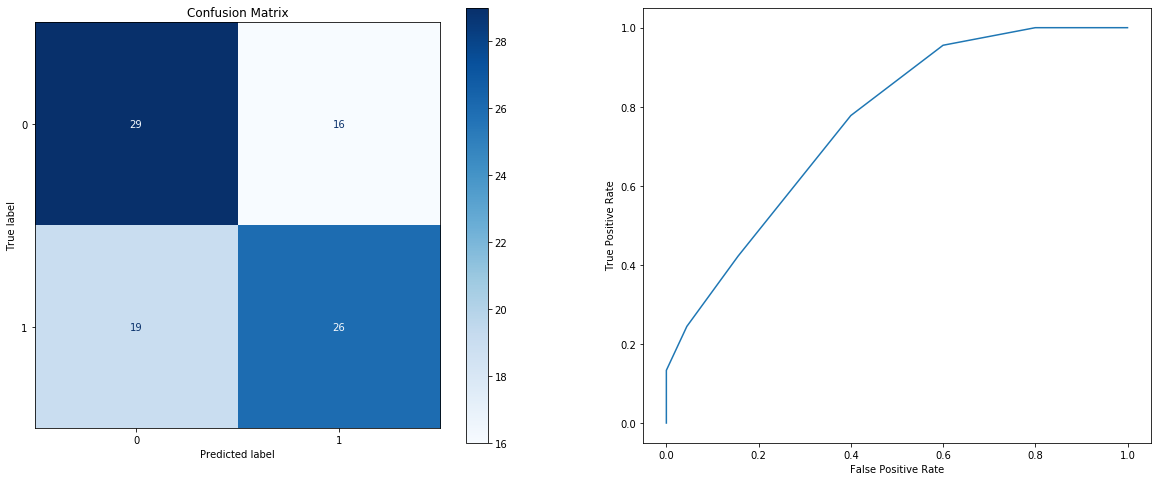

In [ ]:
cats_LGBM=[getAuc_LGBM(X_cats_train, X_cats_test, y_cats_train, y_cats_test, minsplit=2,n_estimators=30)]

# LogReg AUC:  0.748641975308642
  True Positive:  29 
  False Positive:  13 
  True Negative:  32 
  False Negative:  16
  LogReg PPV:  0.6904761904761905
  Sensitivity at 95% specificity:  0.4


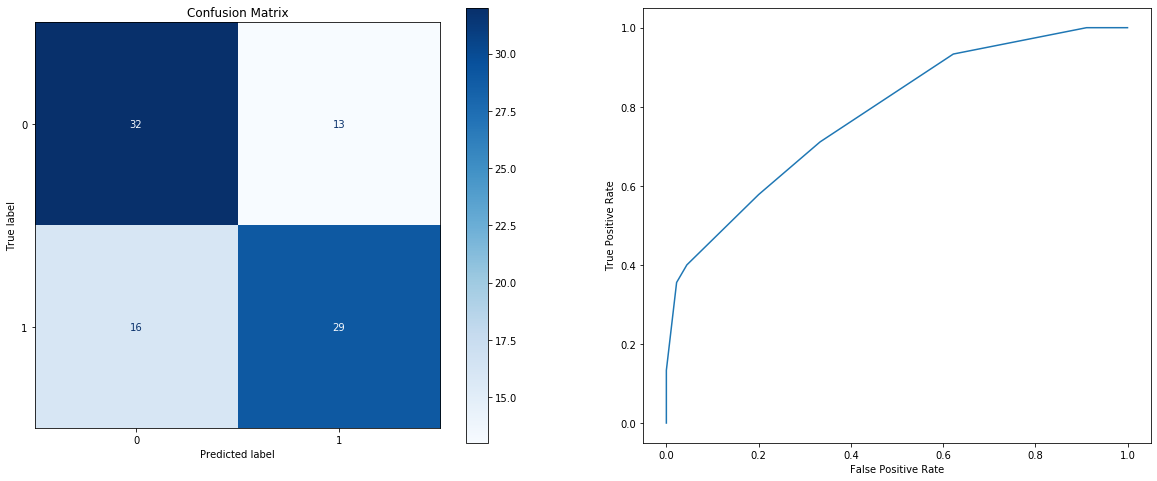

In [ ]:
cats_LogReg=[getAuc_LogReg(X_cats_train, X_cats_test, y_cats_train, y_cats_test, minsplit=3,n_estimators=20)]

# CLASSIFIER AUC:  0.6882731321128154
# CLASSIFIER AUC:  0.7540821375556656
# CONVEX HULL AUC:  0.7966353290450273


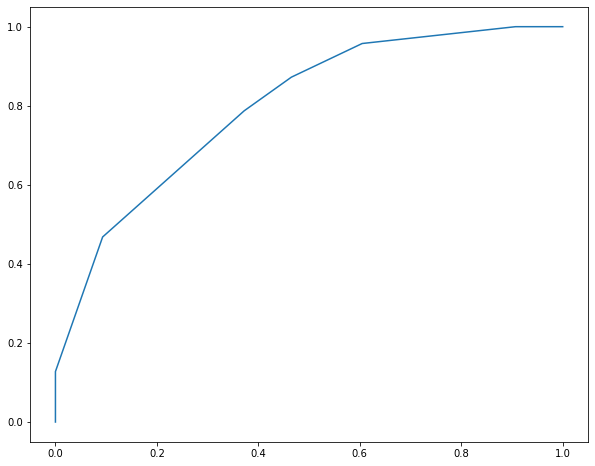

In [ ]:
# Convex Hull of Logistic Regression, Random Forest and LGBM classifiers.
cats_convex=[getAuc(X_cats_train, X_cats_test, y_cats_train, y_cats_test, minsplit=3,n_estimators=20)]

_____
## FOR CATS:
### Best PPV is achieved by LGBM at 62%.
### Best AUC of single classifier is achieved by LGBM at 72%, (and 75% with Logistic Regression, which was not one of the required models), but tried by me after some reading up on models to use for classifying Histogram of Gradient Data.
### We are able to achieve an AUC of 81% with a convex hull of the AUCs of the 3 best models. (seen in the graph directly above).
### As we can tell, these results are lacklustre, due to classical statistical learning models being less effective than other methods such as CNNs in attaining high AUC and PPV. We will now move on to look at the 6 models effectiveness on dogs, before discussing other ways to increase the AUC and PPV.
______________________________________________________________________________

FOR dogs: 
# Decision Tree AUC:  0.5333499253359881
  True Positive:  27 
  False Positive:  29 
  True Negative:  20 
  False Negative:  14
  Decision Tree PPV:  0.48214285714285715
  Sensitivity at 95% specificity:  0.055634987384356606


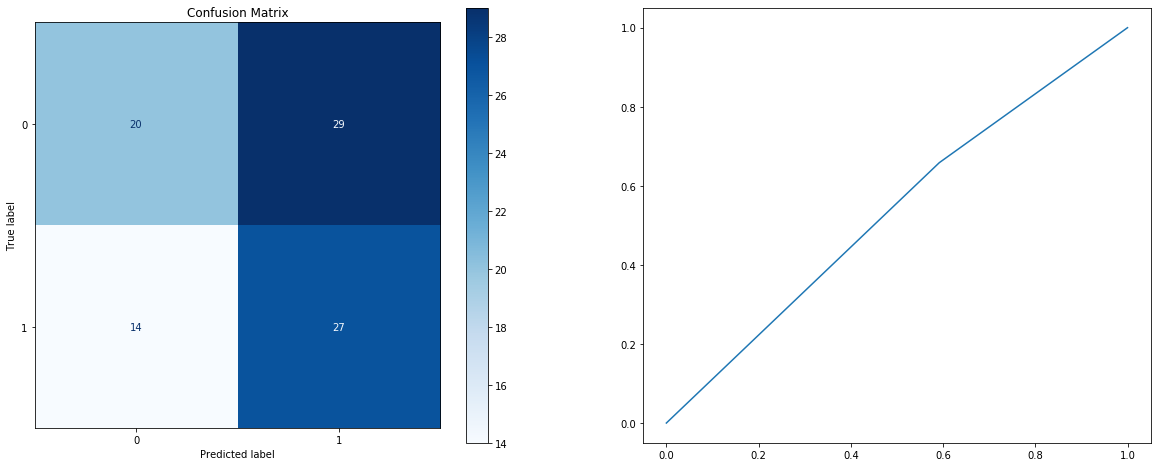

In [ ]:
print("FOR dogs: ")
dogs_DT=[getAuc_DT(X_dogs_train, X_dogs_test, y_dogs_train, y_dogs_test, minsplit=2,n_estimators=20)]



# Random Forest AUC:  0.6834245893479343
  True Positive:  26 
  False Positive:  21 
  True Negative:  28 
  False Negative:  15
  Random Forest PPV:  0.5531914893617021
  Sensitivity at 95% specificity:  0.08414634146341465


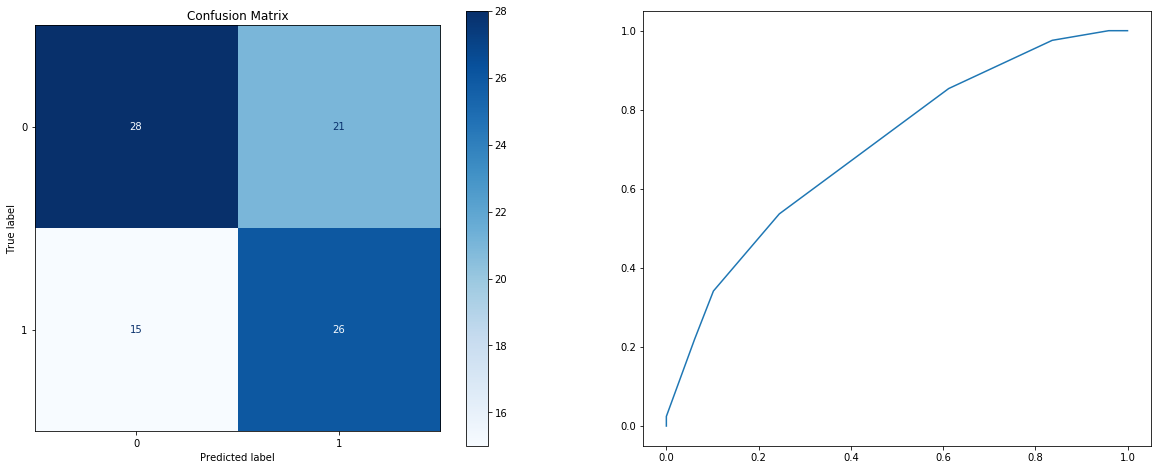

In [ ]:
dogs_RF=[getAuc_RF(X_dogs_train, X_dogs_test, y_dogs_train, y_dogs_test, minsplit=3,n_estimators=20)]

# Extra Trees AUC:  0.6085116973618715
  True Positive:  24 
  False Positive:  23 
  True Negative:  26 
  False Negative:  17
  Extra Trees PPV:  0.5106382978723404
  Sensitivity at 95% specificity:  0.20975609756097563


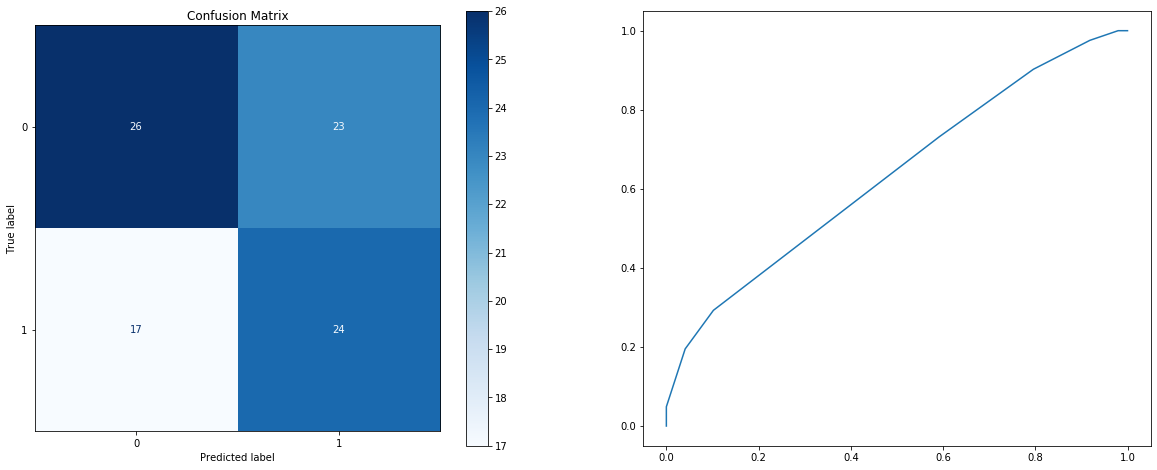

In [ ]:
dogs_ET=[getAuc_ET(X_dogs_train, X_dogs_test, y_dogs_train, y_dogs_test, minsplit=3,n_estimators=20)]

# Gradient Boosting AUC:  0.6002805049088359
  True Positive:  12 
  False Positive:  14 
  True Negative:  17 
  False Negative:  11
  Gradient Boosting PPV:  0.46153846153846156
  Sensitivity at 95% specificity:  0.21739130434782608


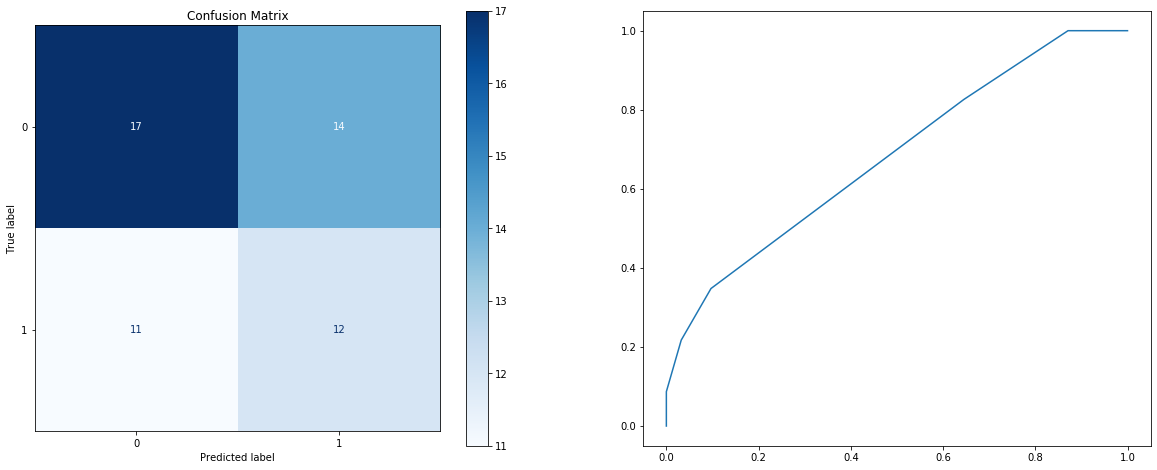

In [ ]:
dogs_GB=[getAuc_GB(X_dogs_train, X_dogs_test, y_dogs_train, y_dogs_test, minsplit=4,n_estimators=20)]

# LGBM AUC:  0.6893827160493826
  True Positive:  32 
  False Positive:  22 
  True Negative:  23 
  False Negative:  13
  LGBM PPV:  0.5925925925925926
  Sensitivity at 95% specificity:  0.15555555555555556


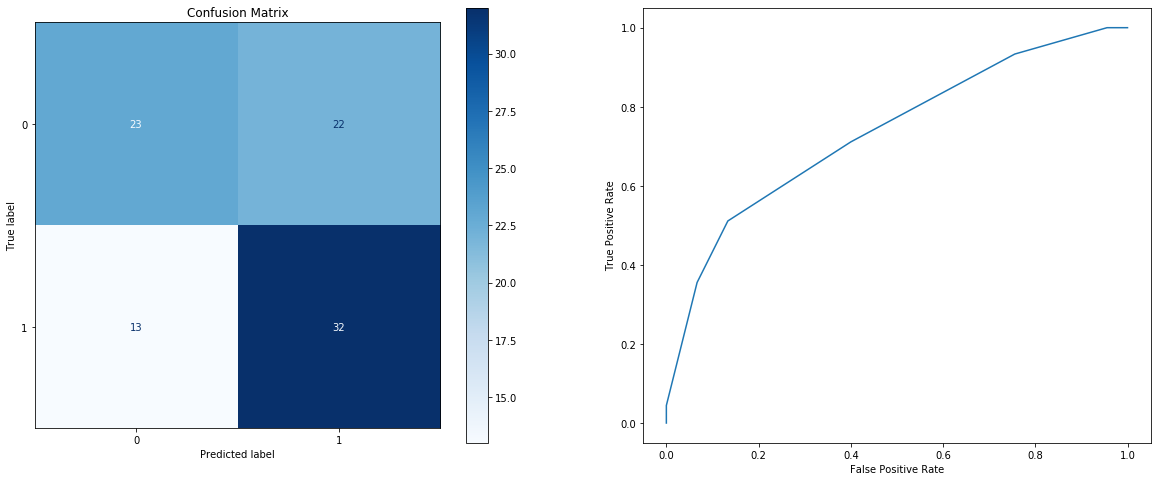

In [ ]:
dogs_LGBM=[getAuc_LGBM(X_dogs_train, X_dogs_test, y_dogs_train, y_dogs_test, minsplit=2,n_estimators=30)]

# LogReg AUC:  0.6774193548387096
  True Positive:  16 
  False Positive:  12 
  True Negative:  19 
  False Negative:  7
  LogReg PPV:  0.5714285714285714
  Sensitivity at 95% specificity:  0.2608695652173913


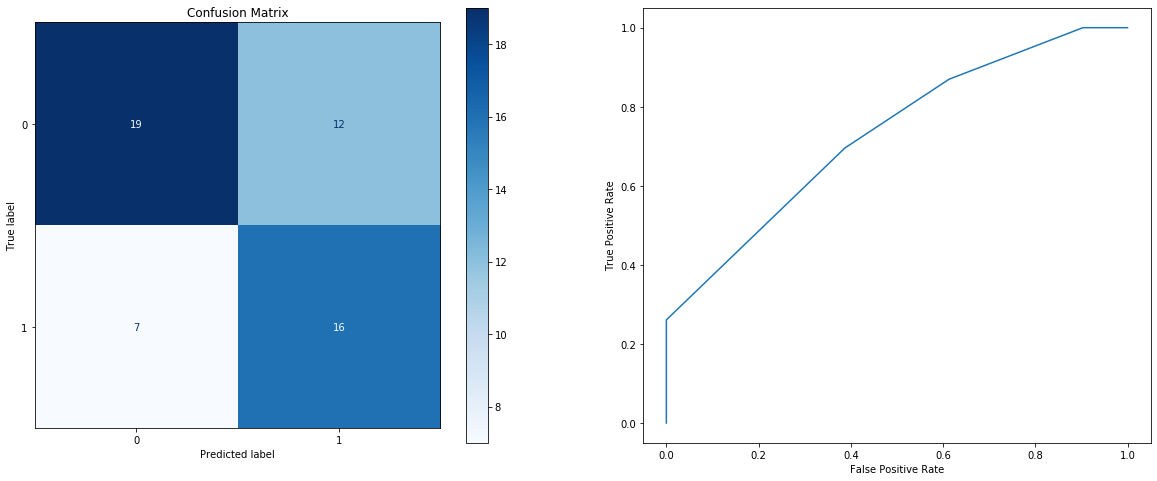

In [ ]:
dogs_LogReg=[getAuc_LogReg(X_dogs_train, X_dogs_test, y_dogs_train, y_dogs_test, minsplit=3,n_estimators=20)]

# CLASSIFIER AUC:  0.6492094861660079
# CLASSIFIER AUC:  0.7193675889328063
# CONVEX HULL AUC:  0.7583992094861661


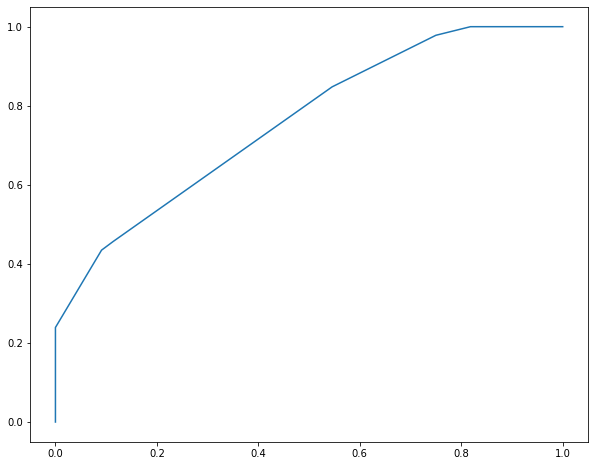

In [ ]:
# Convex Hull of Logistic Regression, Random Forest and LGBM classifiers.
dogs_convex=[getAuc(X_dogs_train, X_dogs_test, y_dogs_train, y_dogs_test, minsplit=3,n_estimators=20)]

_____
## FOR DOGS:
### Best PPV is achieved by LGBM at 59%.
### Best AUC of single classifier is achieved by LGBM at 69%, (and 68% with Logistic Regression, which was not one of the required models), but tried by me after some reading up on models to use for classifying Histogram of Gradient Data.
### We are able to achieve an AUC of 76% with a convex hull of the AUCs of the 2 best models. (seen in the graph directly above).
### As we can tell, these results are lacklustre, due to classical statistical learning models being less effective than other methods such as CNNs in attaining high AUC and PPV. One method of improving the AUCs is to do a convex hull on the graphs, which in the prediction work means predicting some of the input dataset with the first model, and another segment with the other models, which allows us to operate on a part of the new convex curve not attainable by the graphs of the 3 models we did the convex hull on. 
______________________________________________________________________________

___________________________
# APPENDIX: SOME ADDITIONAL WORK TO WORK ON IMPROVING AUC

## After some reading up, I have decide to use Logistic Regression, as well as to do a Convex Hull of LogReg and LGBM Classifiers, which are the 3 more consistently better performing classifiers. I will be just be looking at cats classification for the rest of this additional appendix.

# LogReg AUC:  0.7540821375556656
  True Positive:  28 
  False Positive:  12 
  True Negative:  31 
  False Negative:  19
  LogReg PPV:  0.7
  Sensitivity at 95% specificity:  0.2765957446808511


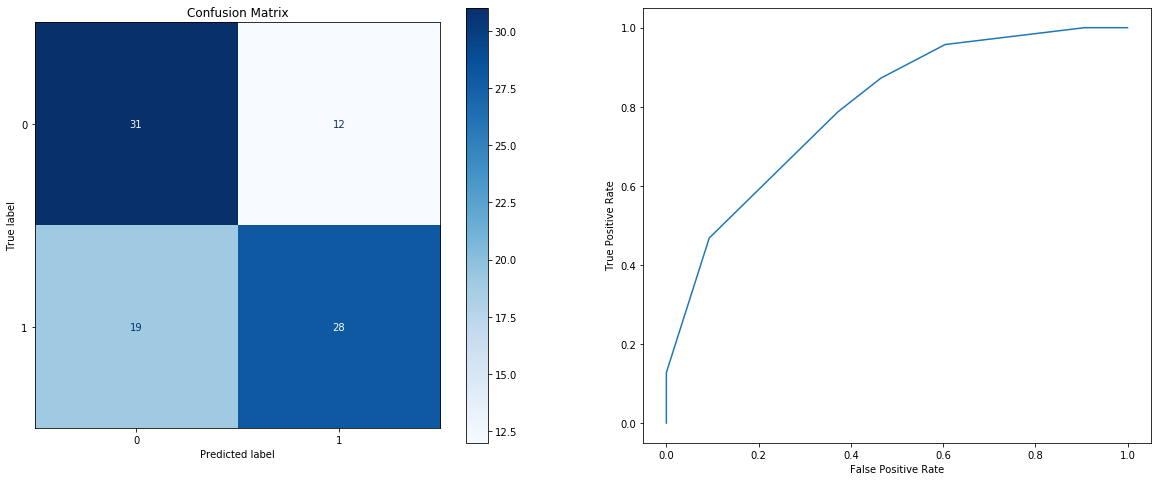

In [ ]:
cats_LogReg=[getAuc_LogReg(X_cats_train, X_cats_test, y_cats_train, y_cats_test, minsplit=3,n_estimators=20)]

_____
### Logistic Regression gives us a result of consistently >70%,  ~75% AUC, which beats Decision Tree, Random Forest, Extra Trees and Gradient Boost models, and offers similar performance to LGBM.
_____

# CLASSIFIER AUC:  0.6870361207323107
# CLASSIFIER AUC:  0.6882731321128154
# CLASSIFIER AUC:  0.7540821375556656
# CONVEX HULL AUC:  0.7966353290450273


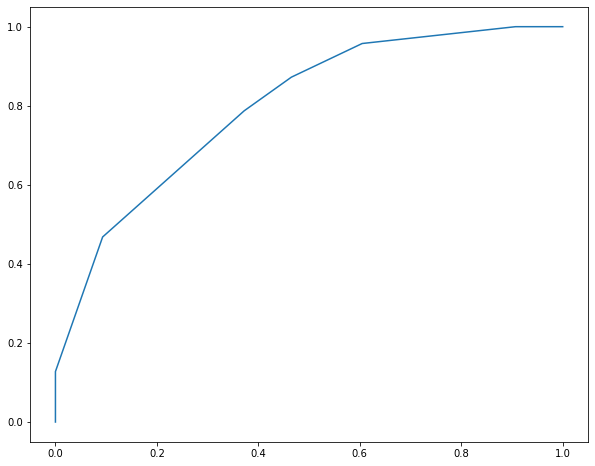

In [ ]:
cats_convex=[getAuc(X_cats_train, X_cats_test, y_cats_train, y_dogs_test, minsplit=3,n_estimators=20)]

_____
### A convex hull including Logistic Regression then gives us 80% AUC, which is a significant improvement over the lacklustre ~60% performances of the various Tree Models 
_____

_____
### Now I will attempt to try Keras, although the small dataset may be a limiting factor since we are trying to train a Neural Network. I may use perhaps a thousand images or so instead from the Larger dataset.

### Update: My laptop struggles to load the data for >1000 images and has trouble training the CNN, as the computer heats up tremendously while each epoch takes a tremendously long time, and as a result, I have only been able to run the full dataset once overnight, and have not been able to play around with tweaking much. Have also attempted training the CNN on Google Colab. I am sure that the results of CNN after tweaking will be extremely interesting however, since we achieving close to 90% accuracy already, and perhaps this will be a project for when I have access to more compute power, perhaps with midway computing or a server at CSIL. 
____

In [ ]:
def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((m,ROWS,COLS,CHANNELS), dtype=np.uint8)
  y = np.zeros((m,1))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[i,:] = np.squeeze(image.reshape((ROWS, COLS, CHANNELS)))
    if 'dog' in image_file.lower() :
      y[i,0] = 1
    elif 'cat' in image_file.lower() :
      y[i,0] = 0
    else : # for test data
      y[i,0] = image_file.split('/')[-1].split('.')[0]
      
    if i%5000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

In [ ]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

ROWS = 64
COLS = 64
CHANNELS = 3

In [ ]:
def load_images_from_folder2(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img,(64,64))
#         img = rescale(img, 1/3, mode='reflect')
#         img_hog, img_hog_img = hog(
#             img, pixels_per_cell=(12, 12),
#             cells_per_block=(2,2),
#             orientations=8,
#             visualize=True,
#             block_norm='L2-Hys')
        images.append(img)
    return images

In [ ]:
cats = load_images_from_folder2("./img/smalldataset/cats")
dogs = load_images_from_folder2("./img/smalldataset/dogs")

In [ ]:
cats

[array([[[ 72,  70,  69],
         [ 76,  74,  73],
         [ 83,  81,  80],
         ...,
         [199, 186, 171],
         [194, 180, 168],
         [190, 176, 164]],
 
        [[ 75,  73,  72],
         [ 80,  77,  77],
         [ 87,  85,  84],
         ...,
         [205, 190, 180],
         [199, 185, 173],
         [195, 181, 169]],
 
        [[ 79,  77,  76],
         [ 82,  80,  79],
         [ 88,  86,  85],
         ...,
         [208, 193, 182],
         [202, 188, 176],
         [197, 183, 171]],
 
        ...,
 
        [[222, 207, 205],
         [225, 210, 208],
         [231, 216, 214],
         ...,
         [209, 197, 186],
         [207, 192, 183],
         [203, 188, 178]],
 
        [[223, 207, 206],
         [226, 212, 210],
         [230, 218, 216],
         ...,
         [208, 194, 185],
         [205, 190, 181],
         [201, 187, 175]],
 
        [[225, 207, 206],
         [227, 213, 212],
         [230, 218, 216],
         ...,
         [209, 193, 186],
  

In [ ]:
images = ['./img/trainsmall/'+i for i in os.listdir('./img/trainsmall')]

In [ ]:
def read_image(file_path):
  #print(file_path)
  img = cv2.imread(file_path)
  #print(img)
  return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((m,ROWS,COLS,CHANNELS), dtype=np.uint8)
  y = np.zeros((m,1))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[i,:] = np.squeeze(image.reshape((ROWS, COLS, CHANNELS)))
    # 0 for dog
    if 'dog' in image_file.lower() :
      y[i,0] = 0
    # 1 for cat
    elif 'cat' in image_file.lower() :
      y[i,0] = 1
    else : # for test data
      y[i,0] = image_file.split('/')[-1].split('.')[0]
      
    if i%5000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

In [ ]:
X, y = prep_data(images)

X.shape is (25000, 64, 64, 3)
Proceed 0 of 25000
Proceed 5000 of 25000
Proceed 10000 of 25000
Proceed 15000 of 25000
Proceed 20000 of 25000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
y_train_one_hot = to_categorical(y_train)
print(y_train_one_hot.shape)

num_classes = y_train_one_hot.shape[1]
print(num_classes)

y_test_one_hot = to_categorical(y_test)
print(y_test_one_hot.shape)

(15000, 2)
2
(10000, 2)


In [ ]:
X_train_norm = X_train / 255
X_test_norm = X_test / 255

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(512, (1,1), activation='relu'))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_norm, y_train_one_hot, validation_data=(X_test_norm, y_test_one_hot), epochs=50, batch_size = 64)

Train on 15000 samples, validate on 10000 samples
Epoch 1/50
15000/15000 [==============================] - 61s 4ms/step - loss: 0.5805 - accuracy: 0.6948 - val_loss: 0.5398 - val_accuracy: 0.7278
Epoch 2/50
15000/15000 [==============================] - 64s 4ms/step - loss: 0.5314 - accuracy: 0.7363 - val_loss: 0.5266 - val_accuracy: 0.7443
Epoch 3/50
15000/15000 [==============================] - 63s 4ms/step - loss: 0.4896 - accuracy: 0.7619 - val_loss: 0.5001 - val_accuracy: 0.7549
Epoch 4/50
15000/15000 [==============================] - 63s 4ms/step - loss: 0.4558 - accuracy: 0.7883 - val_loss: 0.4220 - val_accuracy: 0.8090
Epoch 5/50
15000/15000 [==============================] - 63s 4ms/step - loss: 0.4101 - accuracy: 0.8111 - val_loss: 0.4251 - val_accuracy: 0.7983
Epoch 6/50
15000/15000 [==============================] - 63s 4ms/step - loss: 0.3924 - accuracy: 0.8218 - val_loss: 0.3767 - val_accuracy: 0.8295
Epoch 7/50
15000/15000 [==============================] - 62s 4ms/st

### As we can see, our Convolutional Neural Network here gives us a significant accuracy boost to 93% on the test set  after roughly 50 epochs with 15000 training images on 9000 images test set. This is significantly higher than achieved with our other statistical methods, and can only be improved with more images, and perhaps by tweaking the Neural Network, attempting different activation functions, layer size, and number of layers. However, CNNs result in a very black box result, with the user being unable to explain the statistical reasoning behind the model picking one picture as a cat over another, and thus has its downsides with regards to that aspect as well. All in all, my attempt with training a keras CNN has been fun, extremely taxing on my laptop, and a great learning experience beyond the required assignment. 
#### * CNN model referenced from online publication. 